missClassied: 6
theta values: -0.10271972316101637, 0.31438232450559384, 1.0513866166999442, -0.6232901812301505


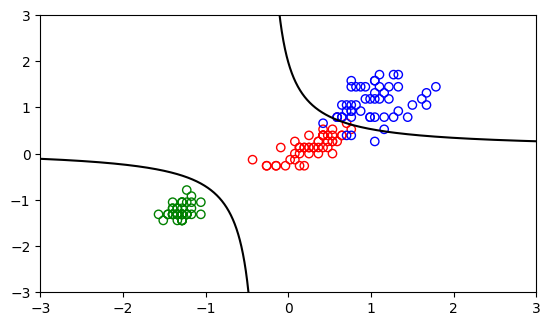

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define constants
cols = 5
rows = 150
i = 0
col1 = 2
col2 = 3

# Initialize arrays
data = np.zeros((150, 5))
data_m = np.zeros((150, 5))
theta = np.ones(4)

# Load the table (CSV)
table = pd.read_csv("/content/sample_data/data.csv")

# Set up the plot
plt.figure(figsize=(6.4, 3.6))

# Iterate over the rows of the table and encode labels
for index, row in table.iterrows():
    x1 = row['x1']
    x2 = row['x2']
    x3 = row['x3']
    x4 = row['x4']
    label = row['type']

    data[i][0] = x1
    data[i][1] = x2
    data[i][2] = x3
    data[i][3] = x4

    # Initially, encode all labels as +1 or -1
    # We don't know which class will be positive or negative after training
    val_labelpos=1.0
    val_labelneg=-1.0

    if label == "Iris-setosa":
        data[i][4] =val_labelpos
    elif label == "Iris-versicolor":
        data[i][4] = val_labelneg
    elif label == "Iris-virginica":
        data[i][4] = val_labelpos

    i += 1

# Calculate mean
def mean(col):
    return np.mean(data[:, col])

# Calculate standard deviation
def sd(mu, col):
    return np.std(data[:, col])

# Normalize data
mu_col1 = mean(col1)
mu_col2 = mean(col2)
sd_col1 = sd(mu_col1, col1)
sd_col2 = sd(mu_col2, col2)

for i in range(150):
    data_m[i][:4] = data[i][:4]  # Copy x1, x2, x3, x4 values
    data_m[i][col1] = (data[i][col1] - mu_col1) / sd_col1
    data_m[i][col2] = (data[i][col2] - mu_col2) / sd_col2
    data_m[i][4] = data[i][4]  # Labels remain the same

# Function to update weights
def update_weights(idx, y_hat, lr):
    error = data_m[idx][4] - y_hat
    if error != 0:  # Only update if there's an error
        theta[0] += lr * error * data_m[idx][col1]
        theta[1] += lr * error * data_m[idx][col2]
        theta[2] += lr * error * data_m[idx][col1] * data_m[idx][col2]
        theta[3] += lr * error

# Perceptron algorithm
def perceptron(lr, epochs):
    global theta
    for epoch in range(epochs):
        for idx in range(150):  # Loop over all samples

            # Calculate y_hat (prediction)
            y_hat = (data_m[idx][col1] * theta[0] +
                     data_m[idx][col2] * theta[1] +
                     data_m[idx][col1] * data_m[idx][col2] * theta[2] +
                     theta[3])
            # Update weights if necessary
            update_weights(idx, y_hat, lr)
    evaluate()


def evaluate():  # Post-training statistics: evaluate which class is negative/positive
  global labelpos, labelneg, theta
  cpt1 = 0
    # Classify based on y_hat values after training
  for idx in range(150):  # First 50: Iris-setosa
      y_hat = (data_m[idx][col1] * theta[0] +
               data_m[idx][col2] * theta[1] +
               data_m[idx][col1] * data_m[idx][col2] * theta[2] +
               theta[3])
      #print("idx data_m[idx][4] y_hat ",idx, data_m[idx][4], y_hat)
      if data_m[idx][4]==val_labelpos :
        if y_hat < 0:
          cpt1 += 1
          #print("label idx y neg", val_labelpos, idx)
      if data_m[idx][4]==val_labelneg :
        if y_hat > 0 :
          cpt1 +=1
          #print("label idx y pos", val_labelneg, idx)
  print(f"missClassied: {cpt1}")
  print(f"theta values: {theta[0]}, {theta[1]}, {theta[2]}, {theta[3]}")

# Drawing function
def draw():
    plt.clf()
    halsize_window = 3
    plt.xlim(-halsize_window, halsize_window)
    plt.ylim(-halsize_window, halsize_window)

    # Decision boundary
    x_lim = -theta[1] / theta[2]
    if x_lim >= 0:
        val1 = x_lim + x_lim / 100
        val2 = x_lim - x_lim / 100
    else:
        val1 = x_lim - x_lim / 100
        val2 = x_lim + x_lim / 100

    x_vals = np.linspace(-halsize_window, val2, 1000)
    y_vals = -(theta[0] * x_vals + theta[3]) / (x_vals * theta[2] + theta[1])
    plt.plot(x_vals, y_vals, 'k-')
    x_vals = np.linspace(val1, halsize_window, 1000)
    y_vals = -(theta[0] * x_vals + theta[3]) / (x_vals * theta[2] + theta[1])
    plt.plot(x_vals, y_vals, 'k-')

    # Plot data points
    plt.scatter(data_m[:50, col1], data_m[:50, col2], facecolors='none', color='green')
    plt.scatter(data_m[50:100, col1], data_m[50:100, col2], facecolors='none', color='red')
    plt.scatter(data_m[100:150, col1], data_m[100:150, col2], facecolors='none', color='blue')

    plt.show()

# Run the perceptron algorithm
perceptron(0.01, 100)
draw()
